In [2]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from datetime import timedelta
import numpy as np
import seaborn

In [4]:
t_date = pd.read_excel("transplantation_date.xlsx")
ids = t_date["id"].unique().tolist()

In [5]:
all = pd.read_excel("general charactestics of hsct.xlsx")
ids_new = all[all["hsct_type"] != "HID_M"][all["id"].isin(ids)]["id"].tolist()
test_results = pd.read_excel("sch_alt_ast_bil_crea_urea_parsed.xlsx")

C:\Users\admin\AppData\Local\Temp\ipykernel_3228\4237520371.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ids_new = all[all["hsct_type"] != "HID_M"][all["id"].isin(ids)]["id"].tolist()


In [6]:
tma = pd.read_excel("ready characteritstics (1).xlsx")
tma = tma[tma["tma_date"].notna()][tma["id"].isin(ids_new)]
tma['date_hsct'] = pd.to_datetime(tma['date_hsct'])
tma['tma_date'] = pd.to_datetime(tma['tma_date'])
tma["date_diff"] = tma["tma_date"] - tma["date_hsct"]
tma_id = tma["id"].tolist()

C:\Users\admin\AppData\Local\Temp\ipykernel_3228\126091940.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tma = tma[tma["tma_date"].notna()][tma["id"].isin(ids_new)]
C:\Users\admin\AppData\Local\Temp\ipykernel_3228\126091940.py:4: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  tma['tma_date'] = pd.to_datetime(tma['tma_date'])


In [ ]:
# SHC > 0
# LDH > 500

In [8]:
# test_results = test_results[test_results["Синоним"] != "TG"]
test_results["Результаты"] = test_results["Результаты"].astype(float)

C:\Users\admin\AppData\Local\Temp\ipykernel_3228\2427249848.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_results["Результаты"] = test_results["Результаты"].astype(float)


In [9]:
def plot_sch(patient_id, ax):
    sch = test_results[test_results["Рег.№"] == patient_id][test_results["Синоним"] == "SHC"]
    
    # fig, ax = plt.subplots(figsize=(8, 4))
    
    ax.plot(sch["Дата забора"], sch["Результаты"], linestyle='-', linewidth=2.0, color="black")
    ax.scatter(x=tma[tma["id"] == patient_id]["date_hsct"], y=0, color="blue", clip_on=False)
    ax.scatter(x=tma[tma["id"] == patient_id]["tma_date"], y=0, color="red", clip_on=False)
    ax.tick_params(axis='x', labelrotation=45)
    
    # ax.set_ylim(ymin=0)
    # plt.show()

# custom_locations = tma[tma["id"] == tma_id[0]]["date_hsct"]  # Index of the categories in the DataFrame
# custom_labels = ["Трансплантация"]

# plt.xticks(custom_locations, custom_labels)


In [10]:
def plot_ldh(patient_id, ax):
    sch = test_results[test_results["Рег.№"] == patient_id][test_results["Синоним"] == "LDH"]
    
    # fig, ax = plt.subplots(figsize=(8, 4))
    
    ax.plot(sch["Дата забора"], sch["Результаты"], linestyle='-', linewidth=2.0, color="black")
    ax.scatter(x=tma[tma["id"] == patient_id]["date_hsct"], y=0, color="blue", clip_on=False, s=100)
    ax.scatter(x=tma[tma["id"] == patient_id]["tma_date"], y=0, color="green", clip_on=False, s=100)
    ax.axhline(y = 500, color ='red')
    ax.tick_params(axis='x', labelrotation=45)
    ax.set_title(patient_id)
    

In [11]:
def plot_creat(patient_id, ax):
    crea = test_results[test_results["Рег.№"] == patient_id][test_results["Синоним"] == "CREA"]
    
    # fig, ax = plt.subplots(figsize=(8, 4))
    
    ax.plot(crea["Дата забора"], crea["Результаты"], linestyle='-', linewidth=2.0, color="black")
    ax.scatter(x=tma[tma["id"] == patient_id]["date_hsct"], y=0, color="blue", clip_on=False, s=100)
    ax.scatter(x=tma[tma["id"] == patient_id]["tma_date"], y=0, color="green", clip_on=False, s=100)
    ax.tick_params(axis='x', labelrotation=45)
    ax.set_title(patient_id)

C:\Users\admin\AppData\Local\Temp\ipykernel_3228\3623492410.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sch = test_results[test_results["Рег.№"] == patient_id][test_results["Синоним"] == "SHC"]
C:\Users\admin\AppData\Local\Temp\ipykernel_3228\3623492410.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sch = test_results[test_results["Рег.№"] == patient_id][test_results["Синоним"] == "SHC"]
C:\Users\admin\AppData\Local\Temp\ipykernel_3228\3623492410.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sch = test_results[test_results["Рег.№"] == patient_id][test_results["Синоним"] == "SHC"]
C:\Users\admin\AppData\Local\Temp\ipykernel_3228\3623492410.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sch = test_results[test_results["Рег.№"] == patient_id][test_results["Синоним"] == "SHC"]
C:\Users\admin\AppData\Local\Temp\ipykernel_3228\3623492410.py:2

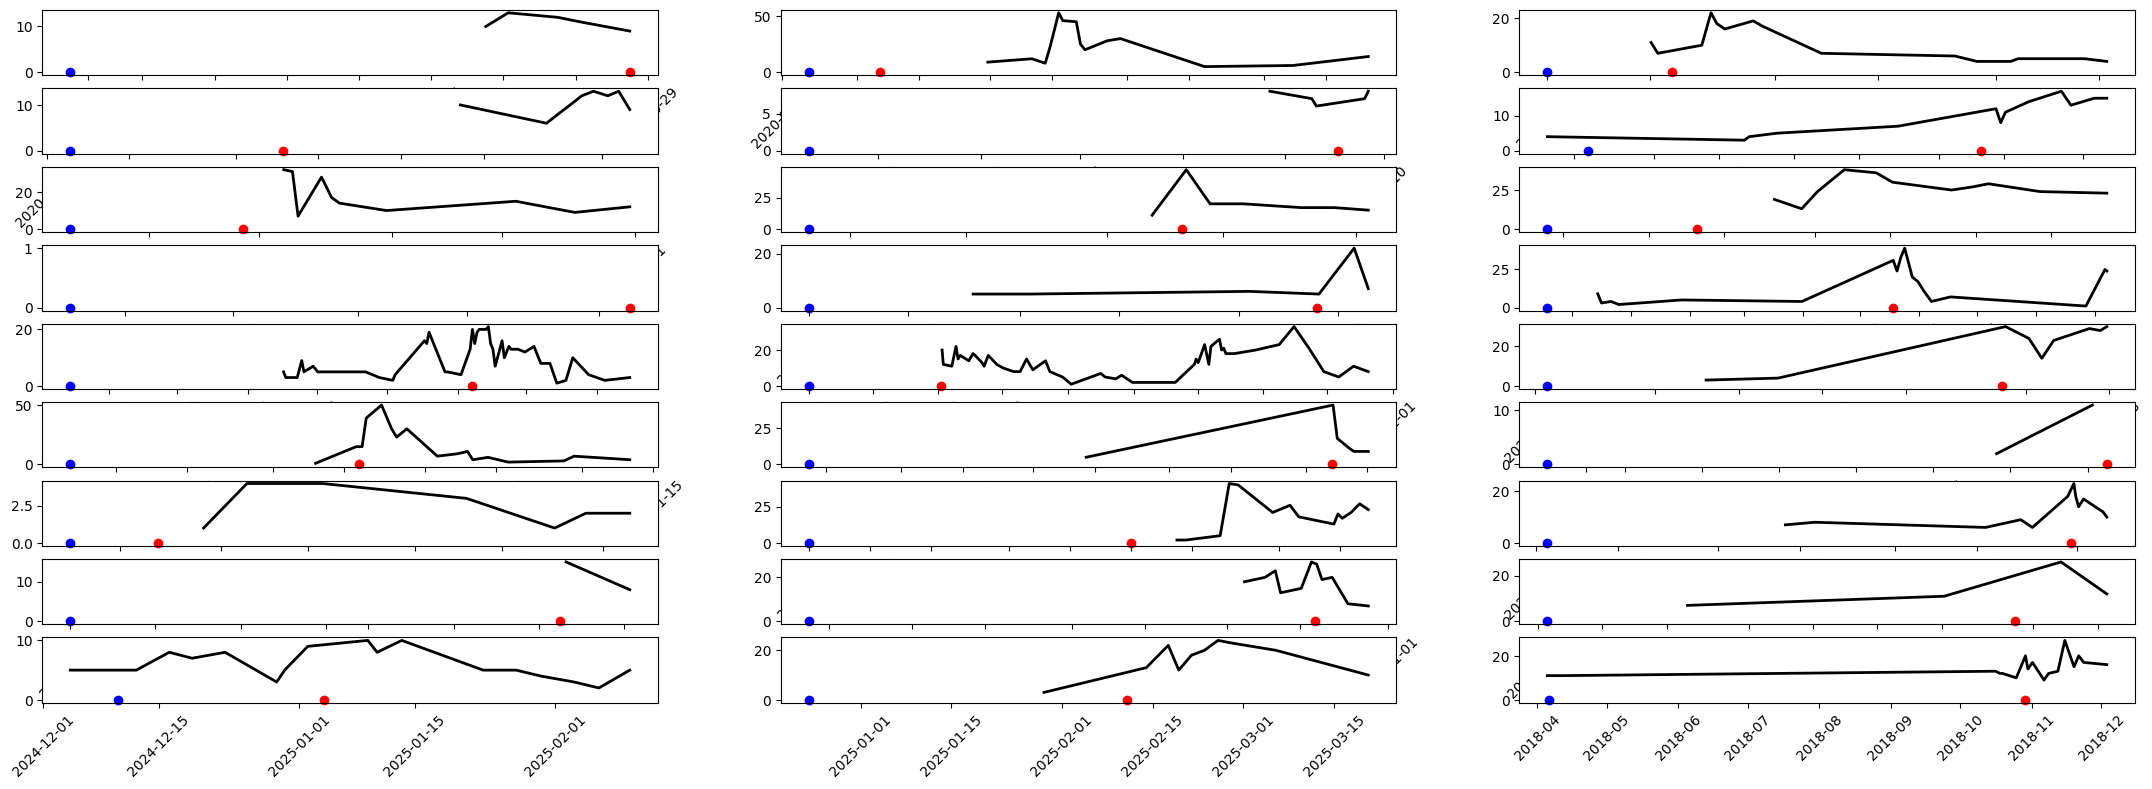

In [12]:
# PLOT SCH

fig, axs = plt.subplots(nrows=9, ncols=3, figsize=(27, 9))

for i, id in enumerate(tma_id):
    plot_sch(id, axs[i//3, i%3])

plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_3228\152291837.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sch = test_results[test_results["Рег.№"] == patient_id][test_results["Синоним"] == "LDH"]
C:\Users\admin\AppData\Local\Temp\ipykernel_3228\152291837.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sch = test_results[test_results["Рег.№"] == patient_id][test_results["Синоним"] == "LDH"]
C:\Users\admin\AppData\Local\Temp\ipykernel_3228\152291837.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sch = test_results[test_results["Рег.№"] == patient_id][test_results["Синоним"] == "LDH"]
C:\Users\admin\AppData\Local\Temp\ipykernel_3228\152291837.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sch = test_results[test_results["Рег.№"] == patient_id][test_results["Синоним"] == "LDH"]
C:\Users\admin\AppData\Local\Temp\ipykernel_3228\152291837.py:2: Use

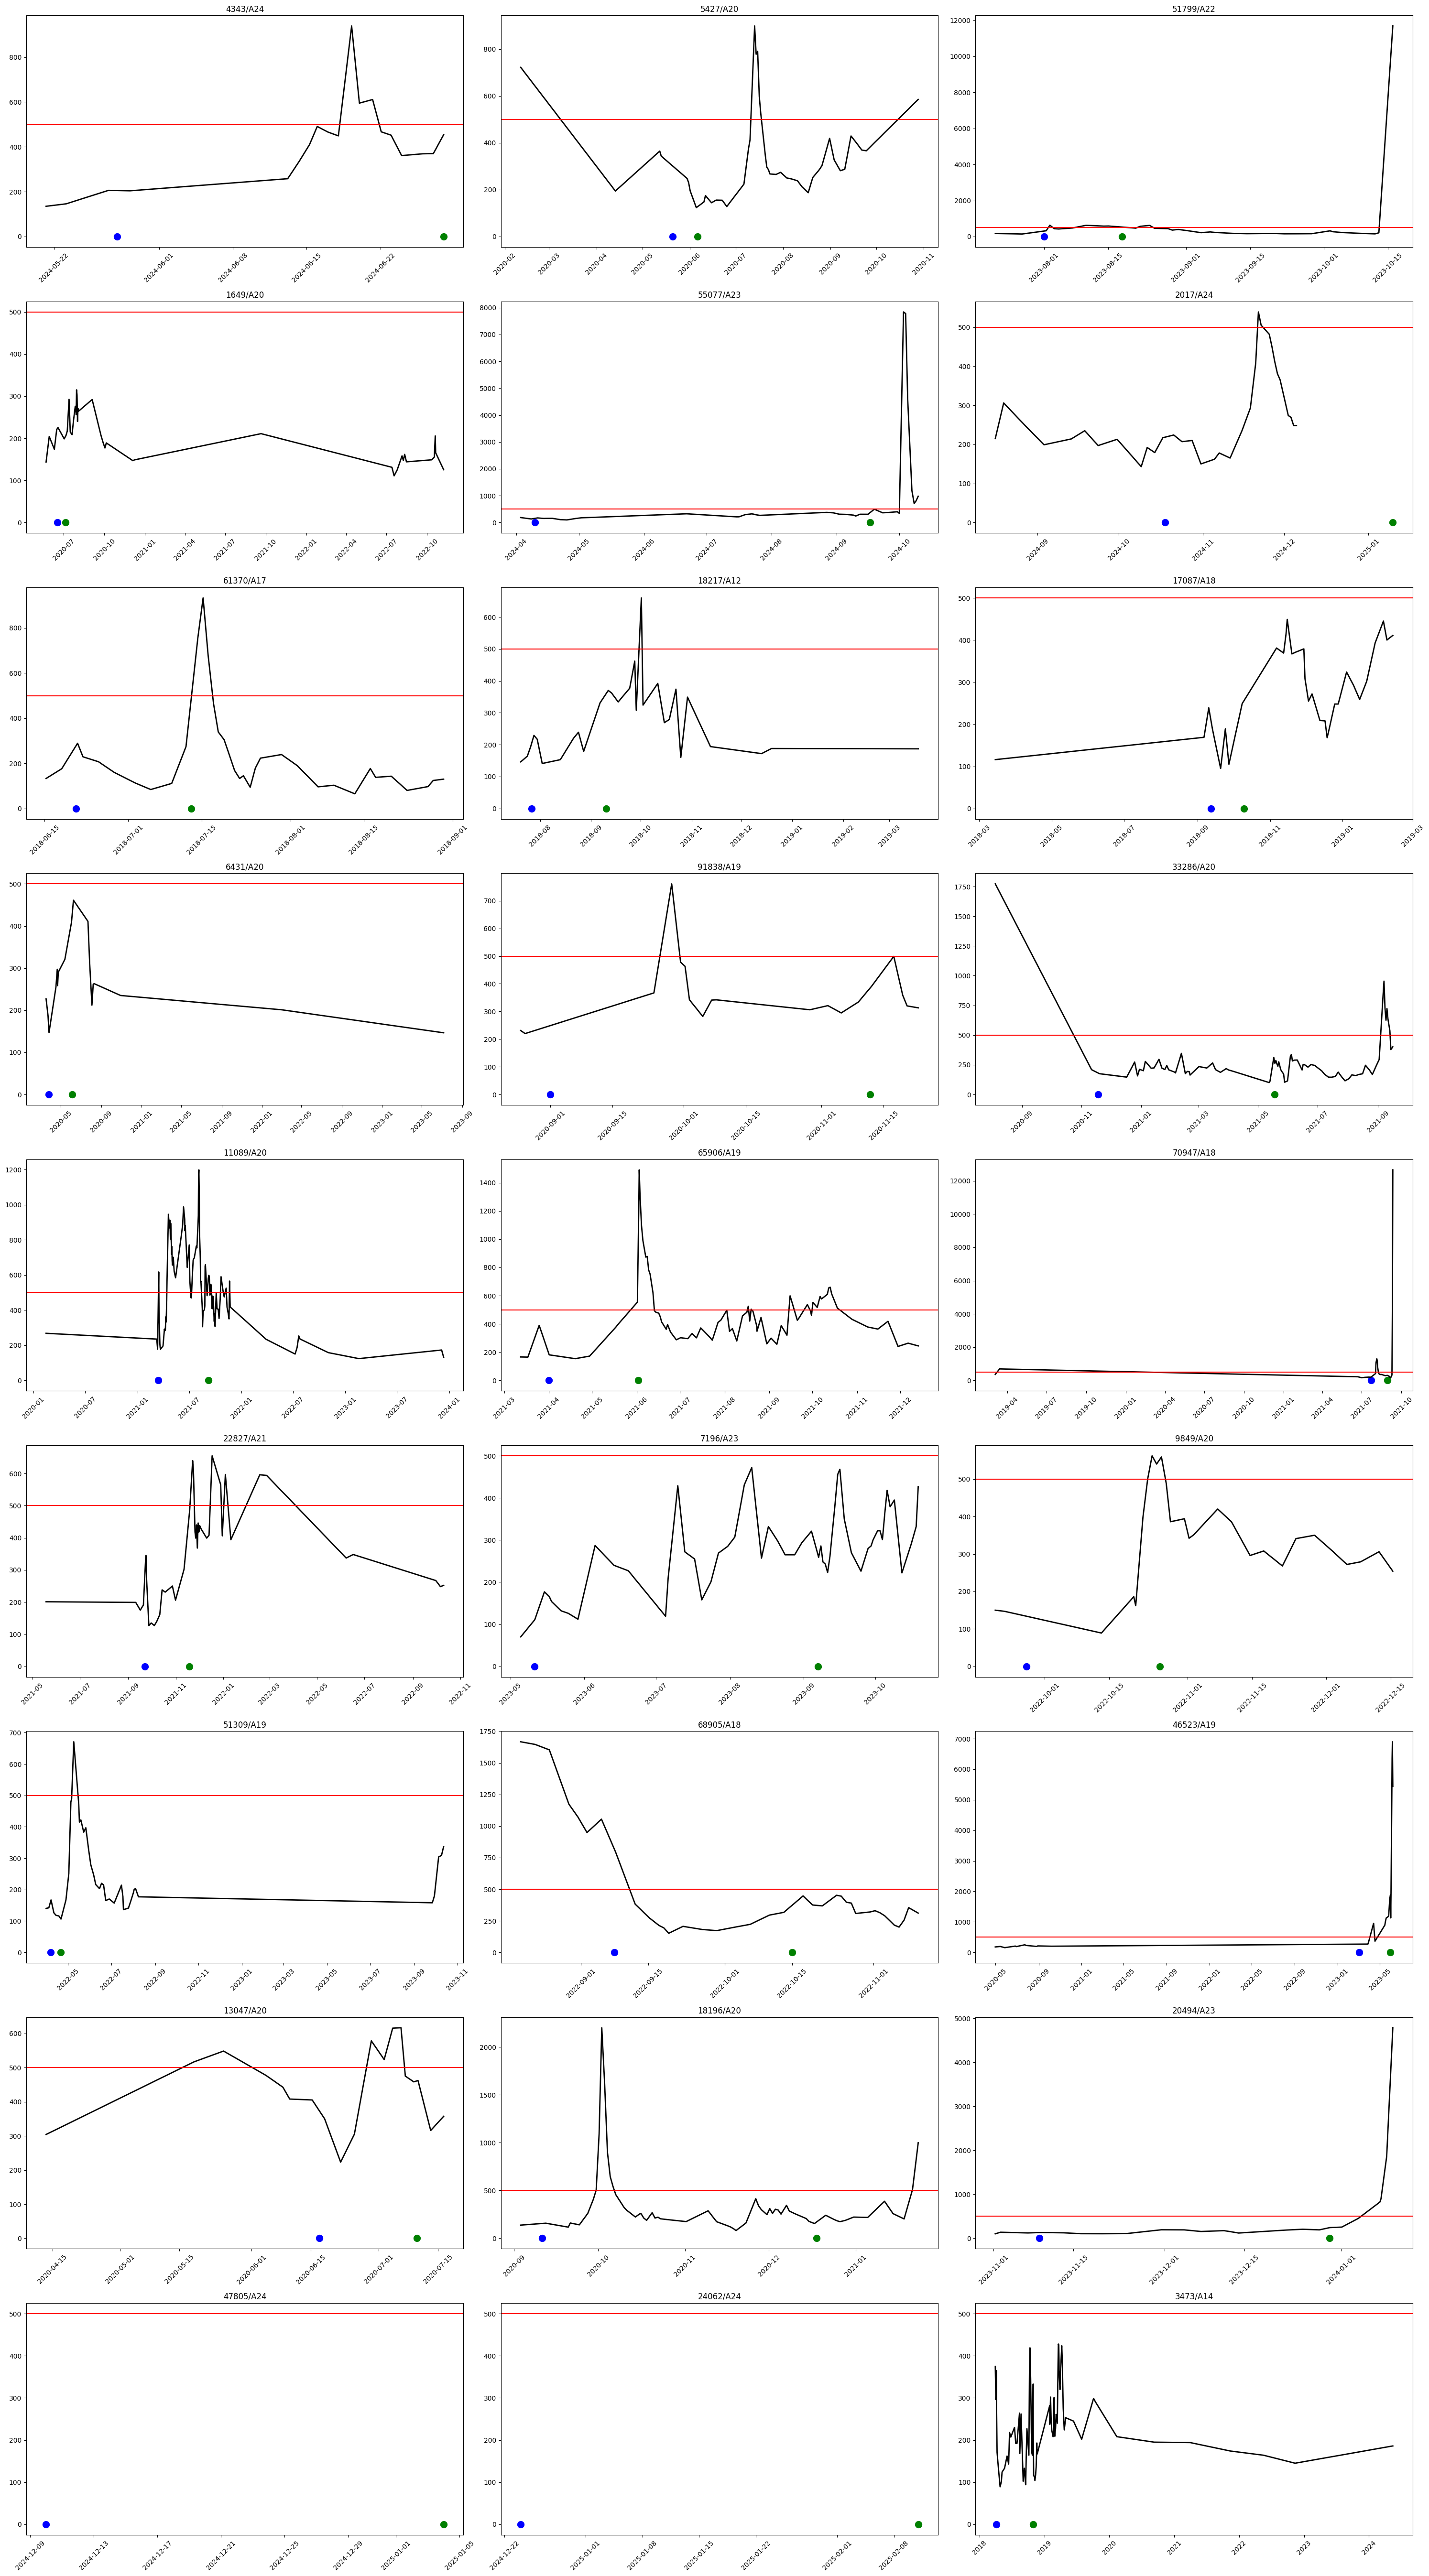

In [13]:
# PLOT LDH

fig, axs = plt.subplots(nrows=9, ncols=3, figsize=(30, 54))

for i, id in enumerate(tma_id):
    plot_ldh(id, axs[i//3, i%3])

# fig.suptitle("LDH levels in TMA patients", fontsize=16)
plt.tight_layout()
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_3228\1186258833.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  creat_df["Результаты"] = creat_df["Результаты"].apply(scale_creat)
C:\Users\admin\AppData\Local\Temp\ipykernel_3228\1186258833.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  creat_df["Синоним"] = "CREA"
C:\Users\admin\AppData\Local\Temp\ipykernel_3228\1269358592.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  crea = test_results[test_results["Рег.№"] == p

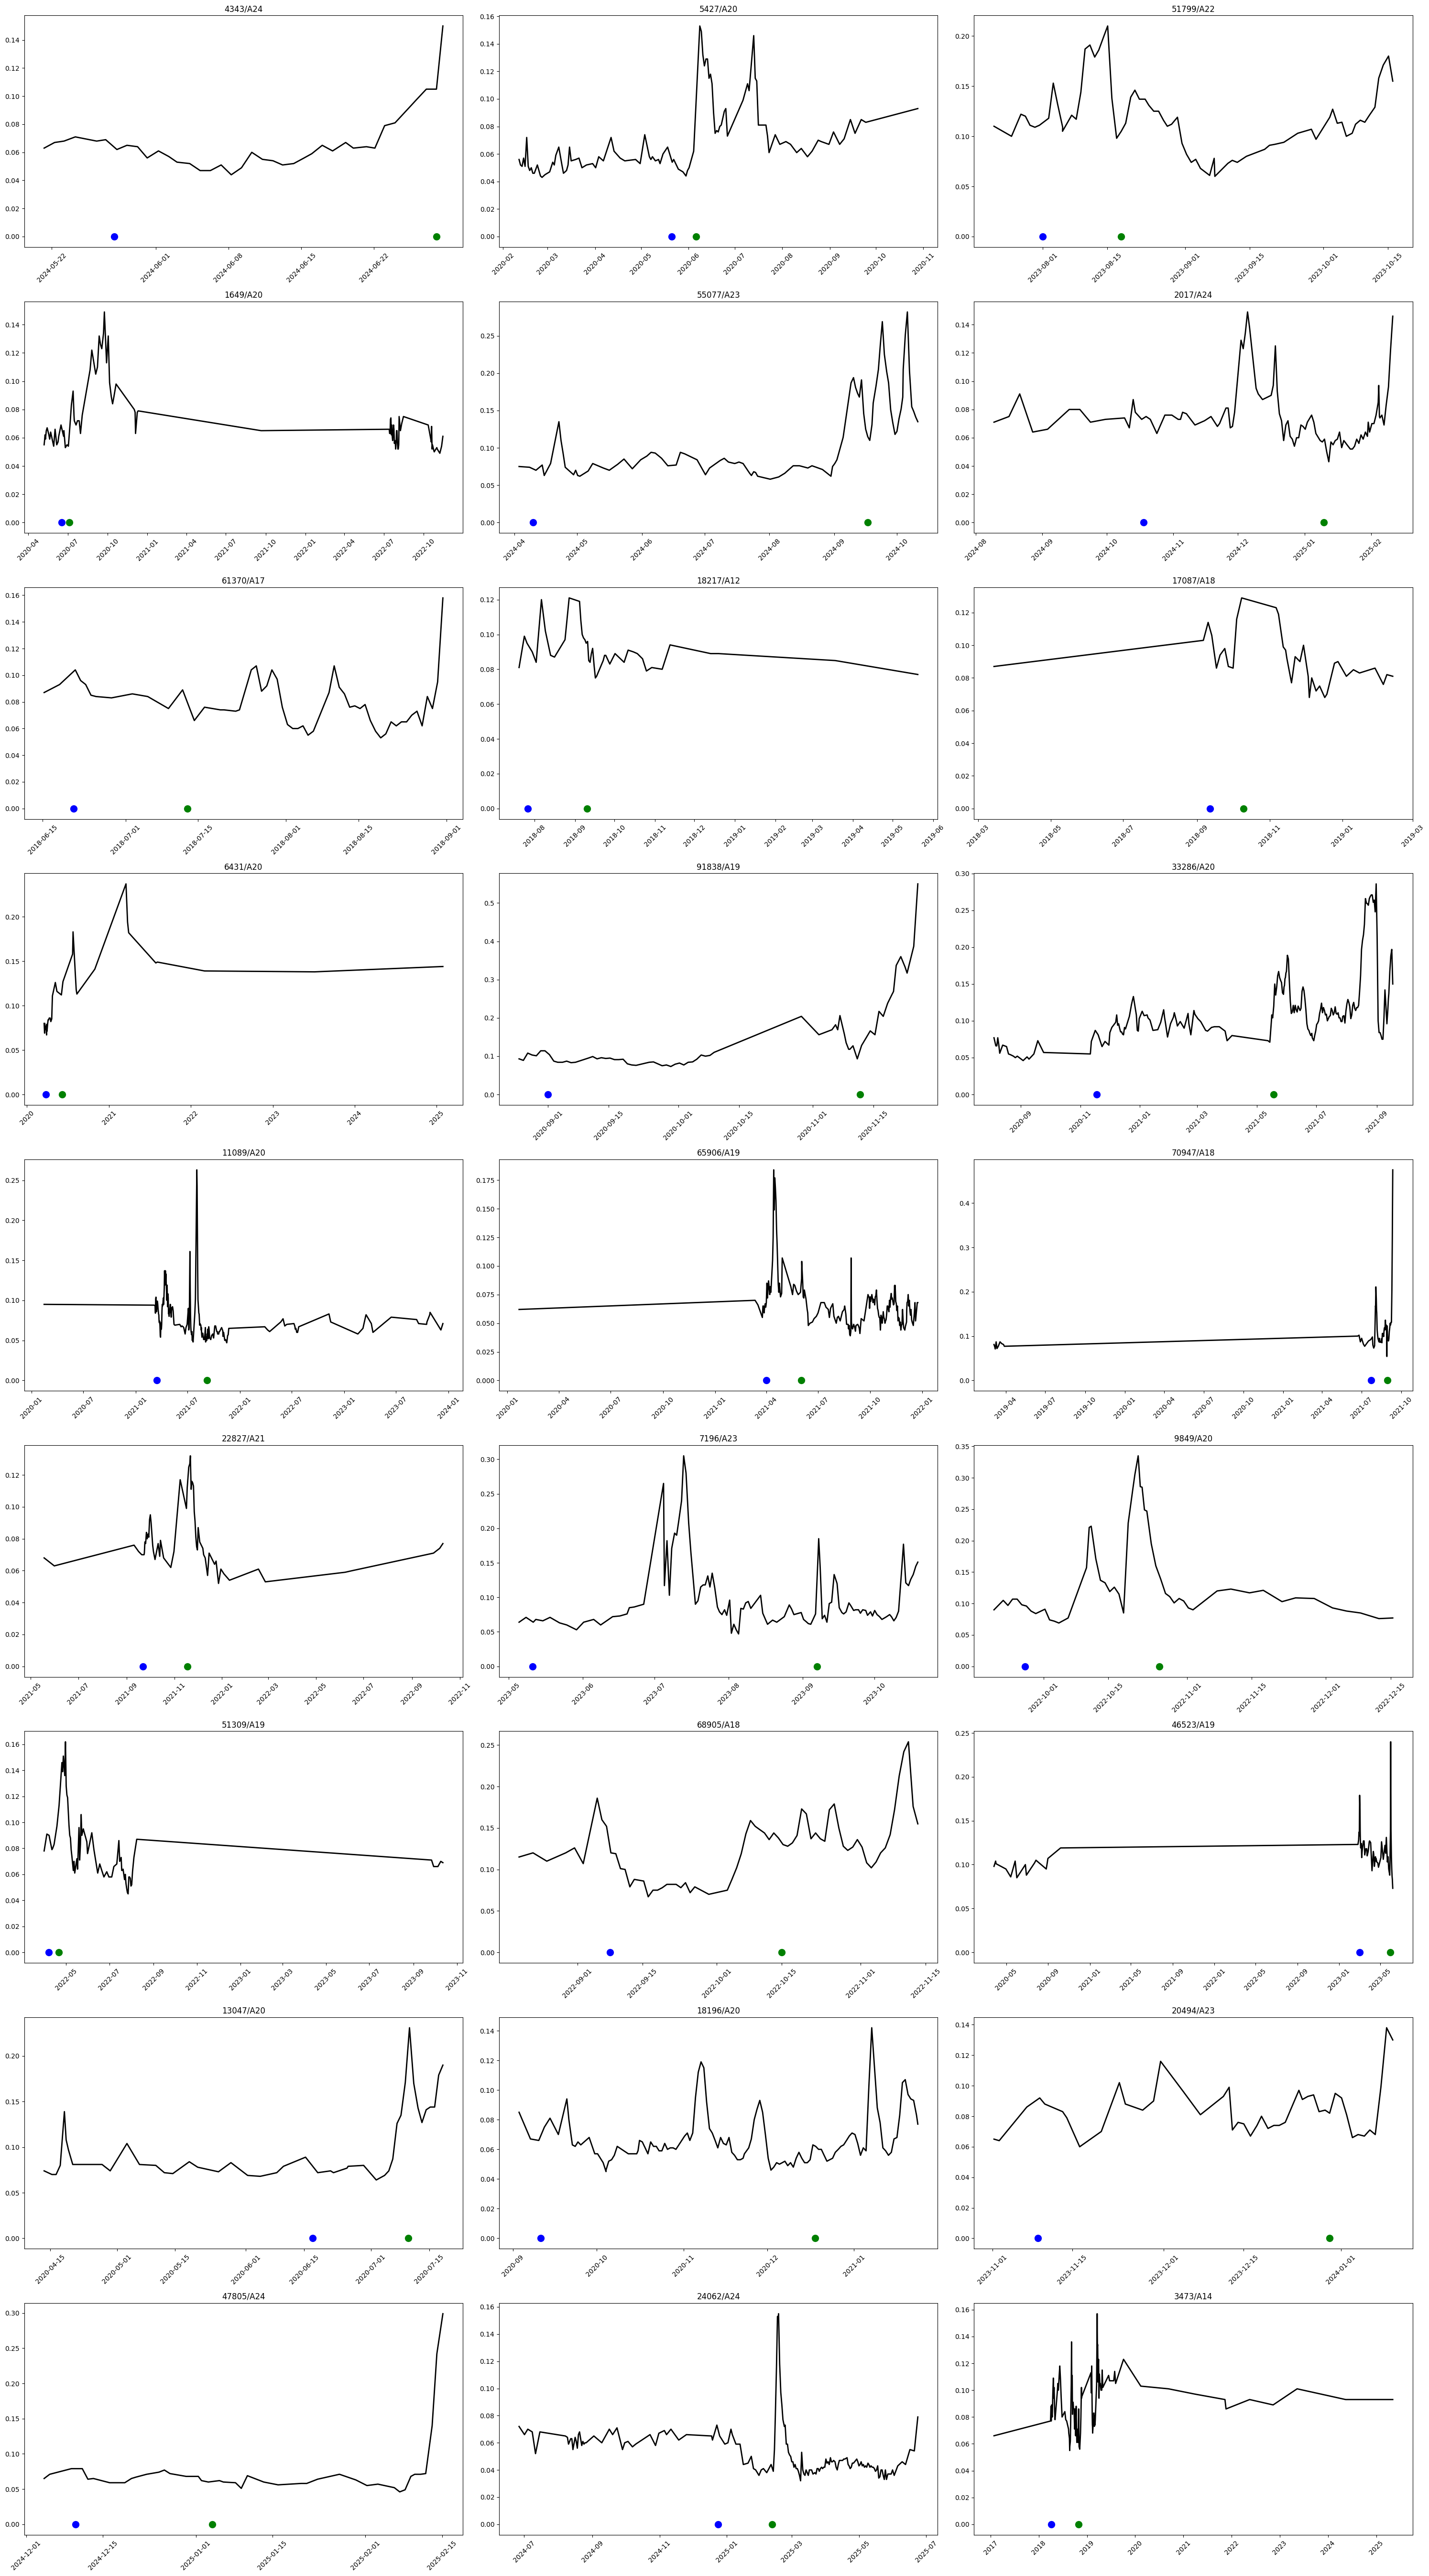

In [14]:
# PLOT CREA

creat = ["CREA", "креат.-2", "креат. -5", "креат.-1", "креат.-3"]
creat_df = test_results[test_results["Синоним"].isin(creat)]

def scale_creat(value):
    value = float(value)
    if value >= 2:
        return value / 1000
    else:
        return value

creat_df["Результаты"] = creat_df["Результаты"].apply(scale_creat)
creat_df["Синоним"] = "CREA"

fig, axs = plt.subplots(nrows=9, ncols=3, figsize=(30, 54))

for i, id in enumerate(tma_id):
    plot_creat(id, axs[i//3, i%3])

# fig.suptitle("LDH levels in TMA patients", fontsize=16)
plt.tight_layout()
plt.show()